In [1]:
import numpy as np
import math
import time
import scipy.signal
from astropy.convolution import convolve, Kernel
from nexusformat.nexus import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# Start in 2D 
xg = np.linspace(-1.0,1,21)
yg = np.linspace(-1.0,1,21)
Xg,Yg = np.meshgrid(xg,yg)
stdev = 1.0/10

#Gaussian window
Z = np.exp(-(1/(2*stdev))*np.abs(Xg**2 + Yg**2))

# Suppose we just use the 0-1 mask that cuts out little circles around each CDW peak
circ = np.sqrt(Xg**2 + Yg**2) < 0.21

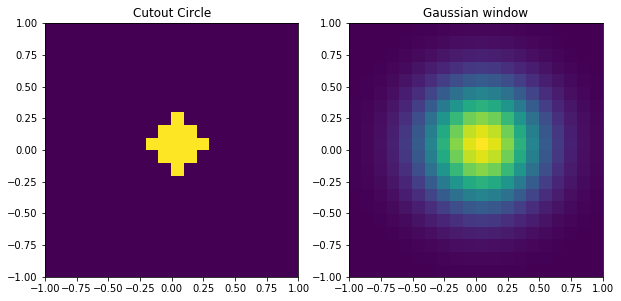

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# little circles
ax1.pcolor(Xg,Yg,circ)
ax1.set_title('Cutout Circle')
ax1.set_aspect('equal', 'box')
# Gaussian window
ax2.pcolor(Xg,Yg,Z)
ax2.set_title('Gaussian window')
ax2.set_aspect('equal', 'box')

plt.savefig('Circ_Gauss.png')

In [4]:
# The locations of the CDW peaks are at (1/2,1/2) & symmetric points
a = np.zeros((10,10))
a[6,6] = 1.0
cdw_locs = np.tile(a,(10,10))

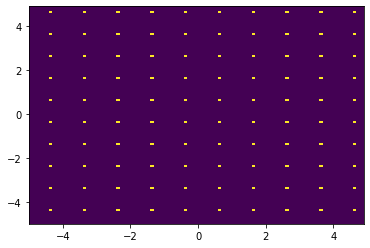

In [5]:
x = np.linspace(-5.0,4.9,100)
y = np.linspace(-5.0,4.9,100)
X,Y = np.meshgrid(x,y)

plt.pcolor(X,Y,cdw_locs)
plt.savefig('CDW_locs.png')

In [6]:
circwin = convolve(cdw_locs,circ)
gwin = convolve(cdw_locs,Z)

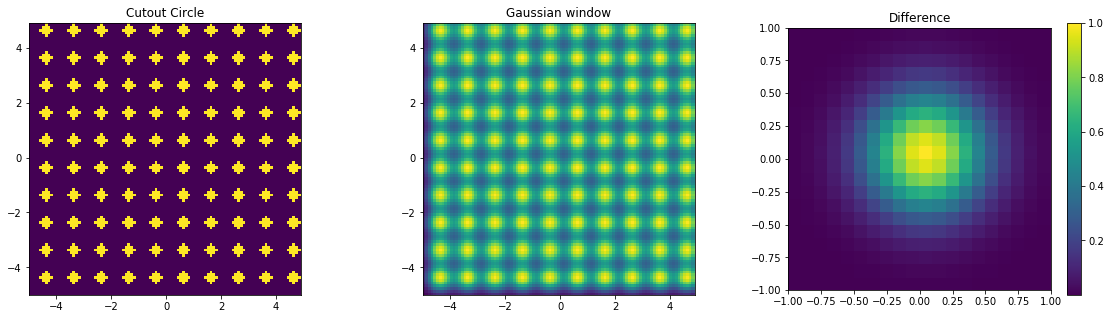

In [7]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

# little circles
ax1.pcolor(X,Y,circwin)
ax1.set_title('Cutout Circle')
ax1.set_aspect('equal', 'box')
# Gaussian window
ax2.pcolor(X,Y,gwin)
ax2.set_title('Gaussian window')
ax2.set_aspect('equal', 'box')


p3 = ax3.pcolor(Xg,Yg,Z)
ax3.set_title('Difference')
ax3.set_aspect('equal', 'box')
fig.colorbar(p3,ax=ax3)

plt.savefig('CG_conv.png')


In [8]:
G = (1/100**2)*np.fft.fftshift(np.real(np.fft.fftn(gwin)))
C = (1/100**2)*np.fft.fftshift(np.real(np.fft.fftn(circwin)))

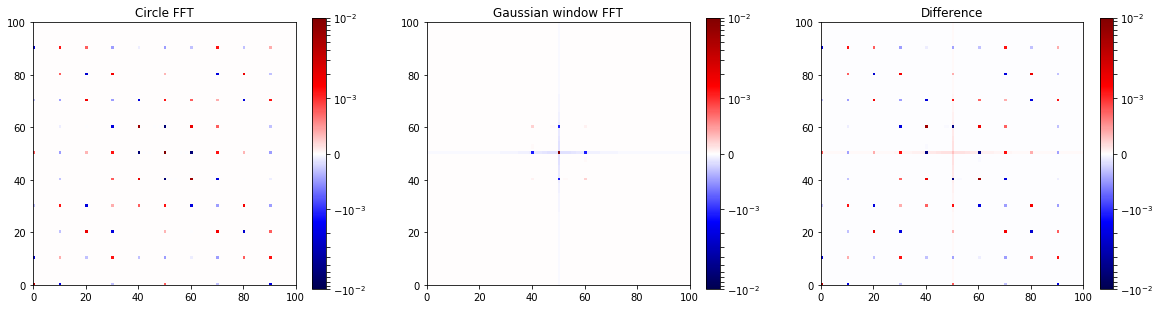

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

# little circles
p1 = ax1.pcolor(C,norm=colors.SymLogNorm(linthresh=0.001, linscale=1.0,
                                              vmin=-0.01, vmax=0.01),
                       cmap='seismic')
ax1.set_title('Circle FFT')
ax1.set_aspect('equal', 'box')
fig.colorbar(p1,ax=ax1)

# Gaussian window
p2 = ax2.pcolor(G,norm=colors.SymLogNorm(linthresh=0.001, linscale=1.0,
                                              vmin=-0.01, vmax=0.01),
                       cmap='seismic')
ax2.set_title('Gaussian window FFT')
ax2.set_aspect('equal', 'box')
fig.colorbar(p2,ax=ax2)

p3 = ax3.pcolor(C-G,norm=colors.SymLogNorm(linthresh=0.001, linscale=1.0,
                                              vmin=-0.01, vmax=0.01),
                       cmap='seismic')
ax3.set_aspect('equal', 'box')
plt.title('Difference')
fig.colorbar(p3,ax=ax3)

plt.savefig('CG_fft.png')

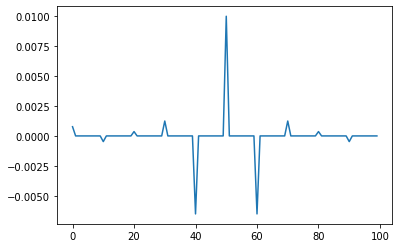

In [12]:
plt.plot(C[50,:])

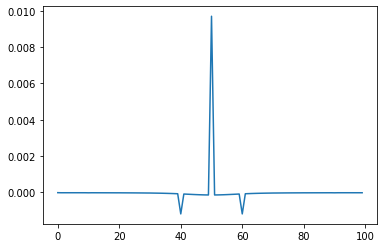

In [13]:
plt.plot(G[50,:])

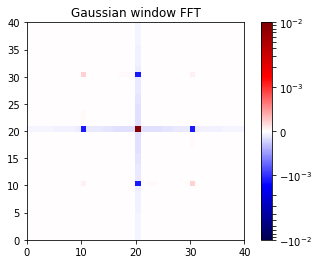

In [11]:
fig,ax = plt.subplots()
p2 = ax.pcolor(G[30:70,30:70],norm=colors.SymLogNorm(linthresh=0.001, linscale=1.0,
                                              vmin=-0.01, vmax=0.01),
                       cmap='seismic')
ax.set_title('Gaussian window FFT')
ax.set_aspect('equal', 'box')
fig.colorbar(p2,ax=ax)

plt.savefig('CG_diff.png')